In [1]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#shape
df.shape

(400, 5)

In [5]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
#checking for nan value
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
#encoding technique
df["Gender"]=df["Gender"].map({"Male":0,"Female":1})

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [9]:
#drop the user id for better prediction
df.drop("User ID",axis=1,inplace=True)

**Splitting the dataset into the Training set and Test set**

In [10]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [12]:
scaler = StandardScaler()
model = scaler.fit(x_train)
model1=scaler.fit(x_test)
x_train= model.transform(x_train)
x_test=model.transform(x_test)

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [13]:
model2=LogisticRegression()
model2.fit(x_train,y_train)

LogisticRegression()

In [14]:
model2.score(x_test,y_test)

0.875

**Step 3 | Predection**

In [15]:
predicted=model2.predict(x_test)

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

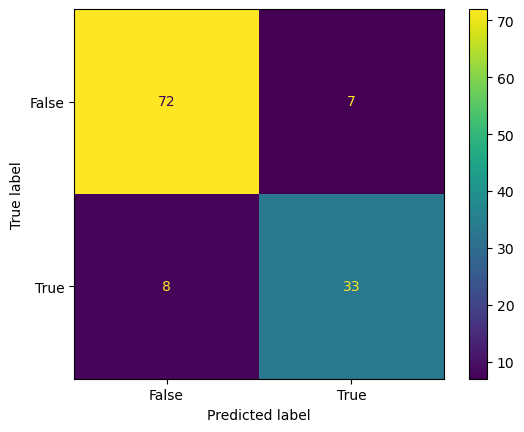

In [16]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

**Visualization**

In [17]:
predicted1=model2.predict(x_train)
df1=pd.DataFrame(x_train,columns=["Gender","Age","EstimatedSalary"])
df2=pd.DataFrame(y_train,columns=["Purchased"])
d_predict=pd.DataFrame(predicted1,columns=["A"])

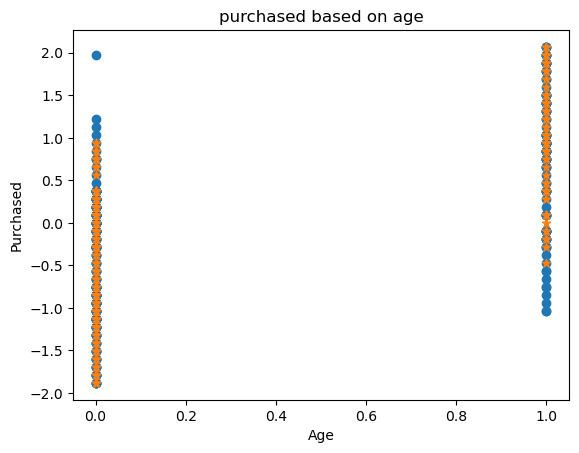

In [18]:
plt.scatter(df2["Purchased"],df1['Age'])
plt.scatter(d_predict["A"],df1['Age'],marker="*")
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.title("purchased based on age")
plt.show()

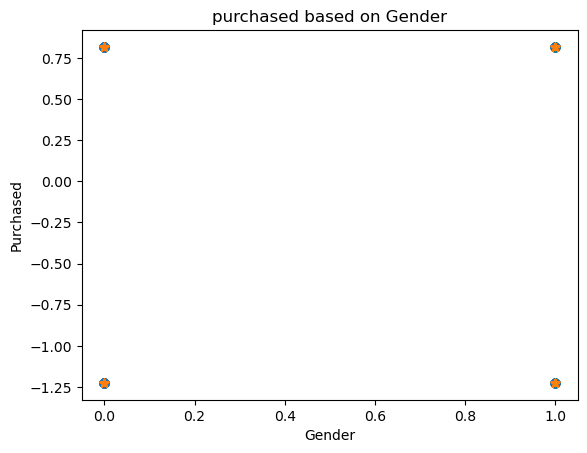

In [19]:
plt.scatter(df2["Purchased"],df1['Gender'])
plt.scatter(d_predict["A"],df1['Gender'],marker="*")
plt.xlabel("Gender")
plt.ylabel("Purchased")
plt.title("purchased based on Gender")
plt.show()

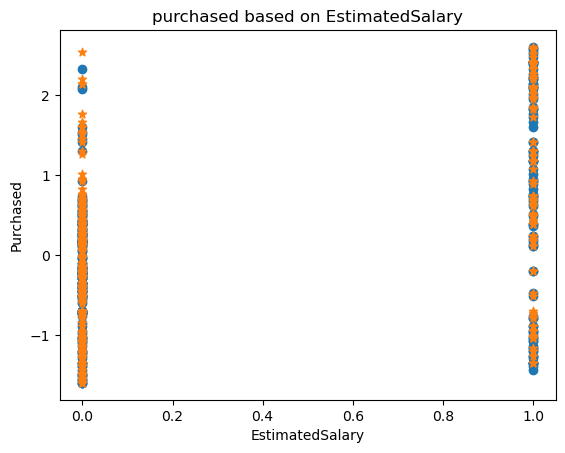

In [20]:
plt.scatter(df2["Purchased"],df1['EstimatedSalary'])
plt.scatter(d_predict["A"],df1['EstimatedSalary'],marker="*")
plt.xlabel("EstimatedSalary")
plt.ylabel("Purchased")
plt.title("purchased based on EstimatedSalary")
plt.show()

# Conclusion

### The Logistic regression perform a score of 83% without hyperparameter tuning and the prediction on the train and test are almost the same and you can see the visualize for best understanding